In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings

In [2]:
warnings.filterwarnings("ignore")

#### Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [3]:
Bank = pd.read_csv("PATH/bank-full.csv", sep = ";")

In [4]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
Bank["y"] = Bank["y"].replace("no",0)
Bank["y"] = Bank["y"].replace("yes",1)

In [6]:
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [7]:
Bank.shape

(45211, 17)

In [8]:
# Removing null values 
Bank = Bank.dropna()
Bank.shape

(45211, 17)

In [9]:
#Dropping extra columns
Data = Bank.drop(Bank.columns[[0, 3, 8, 9, 10, 11, 12, 13]], axis = 1)

In [10]:
Data

,job,marital,default,balance,housing,loan,previous,poutcome,y
0,management,married,no,2143,yes,no,0,unknown,0
1,technician,single,no,29,yes,no,0,unknown,0
2,entrepreneur,married,no,2,yes,yes,0,unknown,0
3,blue-collar,married,no,1506,yes,no,0,unknown,0
4,unknown,single,no,1,no,no,0,unknown,0
...,...,...,...,...,...,...,...,...,...
45206,technician,married,no,825,no,no,0,unknown,1
45207,retired,divorced,no,1729,no,no,0,unknown,1
45208,retired,married,no,5715,no,no,3,success,1
45209,blue-collar,married,no,668,no,no,0,unknown,0


In [11]:
Bdata = pd.get_dummies(Data, columns = ["job", "marital", "default", "housing", "loan", "poutcome"])

In [12]:
Bdata

,balance,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,1
1,29,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,2,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,1506,0,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45207,1729,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
45208,5715,3,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,0
45209,668,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [13]:
# Dividing our data into input and output variables
x = pd.concat([Bdata.iloc[:,:2], Bdata.iloc[:,3:]], axis = 1)
y = Bdata.iloc[:,2]

In [14]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [15]:
# Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [16]:
# Predict for x data set
y_pred = classifier.predict(x)

In [17]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
y_pred_df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

In [19]:
y_pred_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,1
45209,0,0


In [20]:
# Confusion matrix
Confusion_matrix = confusion_matrix(y , y_pred)
print(Confusion_matrix)

[[39587   335]
 [ 4528   761]]


In [21]:
(39587 + 761)/(39587 + 335 + 4528 + 761)

0.8924376810953086

In [22]:
# Accuracy = 89.24 % 

In [23]:
# Classification report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.69      0.14      0.24      5289

    accuracy                           0.89     45211
   macro avg       0.80      0.57      0.59     45211
weighted avg       0.87      0.89      0.86     45211



In [24]:
# ROC curves
fpr , tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)

Text(0, 0.5, 'True Positive')

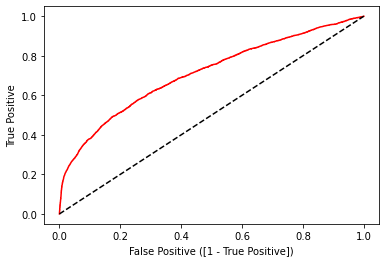

In [25]:
plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive ([1 - True Positive])")
plt.ylabel("True Positive")

In [26]:
auc

0.567746084350208